# <span style='color:blue'>Lab 3</span>
# <span style='color:blue'> <u>Association Rule Mining, Clustering, or Collaborative Filtering </u></span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:blue'><u> Lab 3 Executive Summary </u></span>


---
## Instructions
In the final assignment for this course, you will be using one of three different analysis methods:
- **Option A:** Use clustering on an unlabeled dataset to provide insight or features
- <span style='color:blue'>**Option B:** Use transaction data for mining associations rules</span>
- **Option C:** Use collaborative filtering to build a custom recommendation system<br><br>
Your choice of dataset will largely determine the task that you are trying to achieve, though the dataset does not need to change from your previous tasks.<br><br>
- For example, you might choose to use clustering on your data as a preprocessing step that extracts different features. Then you can use those features to build a classifier and analyze its performance in terms of accuracy (precision, recall) and speed.
- Alternatively, you might choose a completely different dataset and perform rule mining or build a recommendation system.
---

---
## Dataset Selection and Toolkits
<br>
As before, you need to choose a dataset that is not small. It might be massive in terms of the number of attributes (or transactions), classes (or items, users, etc.) or whatever is appropriate for the task you are performing. Note that scikit-learn can be used for clustering analysis, but not for Association Rule Mining (you should use R) or collaborative filtering (you should use graphlabcreate from Dato). Both can be run using Jupyter notebooks as shown in lecture.<br><br>
- One example of a recommendation dataset is the movie lens rating data: http://grouplens.org/ datasets/movielens/  
<br>
- Some examples of association rule mining datasets: http://fimi.ua.ac.be/data/ <br>
<br>
Write a report covering in detail all the steps of the project. The results need to be reproducible using only this report. <br>
Describe all assumptions you make and include all code you use in the Jupyter notebook or as supplemental functions. 
<br><br>
<b>Follow the CRISP-DM framework in your analysis (you are performing all of the CRISP-DM outline).</b>
<br><br>
<span style='color:red'> <b><u>This report is worth 20% of the final grade.</u></b>  </span>
<br>

---

---
## Business Understanding [10 points]
###### <span style='color:blue'>1. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).</span> 

---

We chose to use the MovieLens Small data set, officially called ML-Latest-small data set from GroupLens in order to gain experience working with transaction data and association rules mining. The dataset consists of 4 different comma separated files containing links, movies, ratings and tags. The links file contains unique ID's for each movie (movieId) in the dataset as well as each movie's corresponding IMDB (imdbId) unique ID and themoviedb.org unique ID (tmdbId).
* 100k movie ratings
* 3,600 tags
* 9,000 movies (titles)
* 600 users (by userId only)

Citations:
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

TMDB API Documentation:  
https://www.themoviedb.org/documentation/api/wrappers-libraries  
Python Library: https://github.com/celiao/tmdbsimple/    

IMDB API Documentation:
https://developer.imdb.com/documentation  

------
MoveLens Permission:<br>
Hello!

Thank you for completing the form to request dataset usage. You have been approved to use the datasets as you have described in this form (educational or academic research, NON COMMERCIAL USE). Should any usage details change, you will need to fill out the form again. You have requested to redistribute a small amount of data for your project, which has been approved for the <b>ML-Latest-small data set only</b>. Please notify us of any publications that result from this usage, and follow the guidelines laid out for usage in the associated readme file.

As described in the README file, please acknowledge your use of MovieLens Datasets in any publication or demonstration by citing this paper: F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872  

Please note:
On updated chrome browsers we use a secure URL for grouplens.org (https://grouplens.org) but we link to insecure access for the files (http://files.grouplens.org) and apparently chrome has decided to just ignore such clicks. Until we can fix this issue, when you click the dataset links at grouplens.org you may see a privacy error indicating that something is wrong and you shouldn't do whatever you were doing, or it may just show up as a broken link or 404 Error. 
The best workaround is to download your requested dataset through this link: <http://files.grouplens.org/datasets/movielens/> It's the same link that you find on our MovieLens Dataset page, but pointing the "insecure" version of the site because the secure version is broken. This issue is being worked on right now.

Have a great week, and happy researching!

~Laura

-- 

-----

NOTE: The University of Minnesota began working remotely on March 18th, 2020, and will do so for the indefinite future. To that end, email is the best way to contact me at this time. 

------
Assistant to Professors Stevie Chancellor, Joe Konstan, Loren Terveen, & Lana Yarosh
Administrator GroupLens Research Lab
University of Minnesota, Department of Computer Science & Engineering
200 Union Street SE, 4-192 Keller Hall
Minneapolis, MN  55455
(612)626-2057
http://grouplens.org/
https://twitter.com/grouplens

I acknowledge that the University of Minnesota stands on Miní Sóta Makhóčhe, the homelands of the Dakhóta Oyáte



###### <span style='color:blue'>2. How will you measure the effectiveness of a good algorithm? </span>
--

Ways to measure association rules mining are using Support, Confidence, Lift, Interest <b>--> we need to have a group chat about which one or ones we should focus on.</b>

###### <span style='color:blue'>3. Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?</span>
--

---
## Data Understanding [20 points total]
### <span style='color:blue'>Data Wrangling [10 points]</span>
<b>Questions are answered further down after the wranling is complete and the dataset is shaped</b>

---

In [1]:
import pandas as pd
import numpy as np
import os
import time
import altair as alt
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
# from ICA 5
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

# points to location of my R libraries
lib_loc = 'C:/Users/justi/.conda/pkgs/rpy2-3.4.4-py38r36h10235a5_0/R/win-library/4.1'

os.chdir('C:/Users/justi/GitHub/Lab 3/data')

In [2]:
# let's get some data!
ratings = pd.read_csv('ratings.csv')
items = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

#print out our data
print('\n- - - - - Ratings- - - - - \n')
print(ratings.head())
print(ratings.info())
print('\n- - - - - Items- - - - - - \n')
print(items.head())
print(items.info())
print('\n- - - - - Tags- - - - - - -\n')
print(tags.head())
print(tags.info())
print('\n- - - - - Links- - - - - - \n')
print(links.head())
print(links.info())


- - - - - Ratings- - - - - 

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

- - - - - Items- - - - - - 

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   



In [3]:
# drop NAs from links df where there are missing values for tmdbId
links.dropna(subset=['tmdbId'],inplace=True)
links.reset_index(drop=True,inplace=True)

In [4]:
import copy
movies = ratings.merge(tags, on=['userId', 'movieId'], how="left")
#movies.info()

In [5]:
movies = movies.merge(items, on='movieId', how='left')
#movies.info()

In [6]:
movies = movies.merge(links, on='movieId',how='left')
#movies.info()

In [7]:
movies.rename(columns={"timestamp_x":"rating_timestamp", "timestamp_y":"tag_timestamp"}, inplace = True)
#movies.head()

In [8]:
# replace NaN tag values with "no tag" as opposed to 0 because it is a meaningful value that is easy to intperpret
values = {"tag":"no tag", "tag_timestamp":0}
movies.fillna(value = values, inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   userId            102677 non-null  int64  
 1   movieId           102677 non-null  int64  
 2   rating            102677 non-null  float64
 3   rating_timestamp  102677 non-null  int64  
 4   tag               102677 non-null  object 
 5   tag_timestamp     102677 non-null  float64
 6   title             102677 non-null  object 
 7   genres            102677 non-null  object 
 8   imdbId            102664 non-null  float64
 9   tmdbId            102664 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 8.6+ MB


In [9]:
# change timestamps to integers for manipulation
movies.tag_timestamp = movies.tag_timestamp.astype("int64")

# let's convert those timestamps!
import datetime as dt

movies.rating_timestamp = pd.to_datetime([dt.datetime.utcfromtimestamp(x) for x in movies.rating_timestamp])
movies.tag_timestamp = pd.to_datetime([dt.datetime.utcfromtimestamp(x) for x in movies.tag_timestamp])


In [10]:
# breakout years, months, days, hours
movies['rating_year'] = movies['rating_timestamp'].dt.year
movies['rating_month'] = movies['rating_timestamp'].dt.month_name()
movies['rating_day'] = movies['rating_timestamp'].dt.day_name()
movies['rating_hour'] = movies['rating_timestamp'].dt.hour

movies['tag_year'] = movies['tag_timestamp'].dt.year
movies['tag_month'] = movies['tag_timestamp'].dt.month_name()
movies['tag_day'] = movies['tag_timestamp'].dt.day_name()
movies['tag_hour'] = movies['tag_timestamp'].dt.hour




In [11]:
# break apart the movie title and release year
movies['release_year'] = movies.title.str.slice(-6)
movies.title = movies.title.str.slice(stop = -7)
# remove parentheses from release_year
movies.release_year = movies.release_year.replace(to_replace = ['\(','\)'],value='', regex=True)

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userId            102677 non-null  int64         
 1   movieId           102677 non-null  int64         
 2   rating            102677 non-null  float64       
 3   rating_timestamp  102677 non-null  datetime64[ns]
 4   tag               102677 non-null  object        
 5   tag_timestamp     102677 non-null  datetime64[ns]
 6   title             102677 non-null  object        
 7   genres            102677 non-null  object        
 8   imdbId            102664 non-null  float64       
 9   tmdbId            102664 non-null  float64       
 10  rating_year       102677 non-null  int64         
 11  rating_month      102677 non-null  object        
 12  rating_day        102677 non-null  object        
 13  rating_hour       102677 non-null  int64         
 14  tag_

3     32499
2     28908
4     17247
1     16659
5      5579
6      1400
7       382
10        2
8         1
Name: genres, dtype: int64
Comedy                                            7250
Drama                                             6403
Comedy|Romance                                    4001
Comedy|Drama|Romance                              3039
Drama|Romance                                     2880
                                                  ... 
Children|Crime|Drama                                 1
Crime|Drama|Horror|Mystery                           1
Action|Adventure|Animation|Comedy|Thriller           1
Adventure|Fantasy|Musical|Romance                    1
Action|Adventure|Comedy|Drama|Fantasy|Thriller       1
Name: genres, Length: 951, dtype: int64


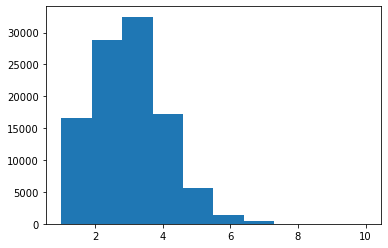

In [13]:
# let's look at separating the movie genres
genres = pd.DataFrame(movies.genres.str.count('\|') + 1)
print(genres.genres.value_counts())
print(movies.genres.value_counts())
plt.hist(genres.genres)
plt.show()


In [14]:
# break up the genres into different columns, use 'end' for NA
genres = pd.DataFrame( movies.genres.str.split('\|', expand=True))
genres.fillna('end', inplace=True)
print(genres.isna().value_counts())
print(genres.head())


0      1      2      3      4      5      6      7      8      9    
False  False  False  False  False  False  False  False  False  False    102677
dtype: int64
           0          1         2       3        4    5    6    7    8    9
0  Adventure  Animation  Children  Comedy  Fantasy  end  end  end  end  end
1     Comedy    Romance       end     end      end  end  end  end  end  end
2     Action      Crime  Thriller     end      end  end  end  end  end  end
3    Mystery   Thriller       end     end      end  end  end  end  end  end
4      Crime    Mystery  Thriller     end      end  end  end  end  end  end


In [15]:
pos = 1
for i in range(genres.shape[1]):
    genres.rename(columns={i : "genre_" + str(pos)}, inplace=True)
    pos += 1

In [16]:
movies.drop(columns='genres', inplace=True)
movies = movies.join(genres)
movies.head()

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,imdbId,tmdbId,rating_year,...,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,1,1,4.0,2000-07-30 18:45:03,no tag,1970-01-01,Toy Story,114709.0,862.0,2000,...,Adventure,Animation,Children,Comedy,Fantasy,end,end,end,end,end
1,1,3,4.0,2000-07-30 18:20:47,no tag,1970-01-01,Grumpier Old Men,113228.0,15602.0,2000,...,Comedy,Romance,end,end,end,end,end,end,end,end
2,1,6,4.0,2000-07-30 18:37:04,no tag,1970-01-01,Heat,113277.0,949.0,2000,...,Action,Crime,Thriller,end,end,end,end,end,end,end
3,1,47,5.0,2000-07-30 19:03:35,no tag,1970-01-01,Seven (a.k.a. Se7en),114369.0,807.0,2000,...,Mystery,Thriller,end,end,end,end,end,end,end,end
4,1,50,5.0,2000-07-30 18:48:51,no tag,1970-01-01,"Usual Suspects, The",114814.0,629.0,2000,...,Crime,Mystery,Thriller,end,end,end,end,end,end,end


In [17]:
movies.columns

Index(['userId', 'movieId', 'rating', 'rating_timestamp', 'tag',
       'tag_timestamp', 'title', 'imdbId', 'tmdbId', 'rating_year',
       'rating_month', 'rating_day', 'rating_hour', 'tag_year', 'tag_month',
       'tag_day', 'tag_hour', 'release_year', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8', 'genre_9',
       'genre_10'],
      dtype='object')

In [18]:
# change Id's into categorical dtypes

# remove NaN tmdbId rows from the movies df
inds = movies[movies.isna().any(axis=1)].index.to_list()
movies.drop(index=inds,inplace=True)

# change tmdbId to integer for searching the movie database
movies.tmdbId = movies.tmdbId.astype('int64')

# change all cat attrs to categorical
cat_features = ['userId', 'movieId','imdbId', 'tmdbId',  'rating_year',
       'rating_month', 'rating_day', 'rating_hour', 'tag_year', 'tag_month',
       'tag_day', 'tag_hour', 'release_year', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8', 'genre_9',
       'genre_10']
movies[cat_features] = movies.copy()[cat_features].astype("category")


movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102664 entries, 0 to 102676
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userId            102664 non-null  category      
 1   movieId           102664 non-null  category      
 2   rating            102664 non-null  float64       
 3   rating_timestamp  102664 non-null  datetime64[ns]
 4   tag               102664 non-null  object        
 5   tag_timestamp     102664 non-null  datetime64[ns]
 6   title             102664 non-null  object        
 7   imdbId            102664 non-null  category      
 8   tmdbId            102664 non-null  category      
 9   rating_year       102664 non-null  category      
 10  rating_month      102664 non-null  category      
 11  rating_day        102664 non-null  category      
 12  rating_hour       102664 non-null  category      
 13  tag_year          102664 non-null  category      
 14  tag_

In [19]:
movies.head(5)

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,imdbId,tmdbId,rating_year,...,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,1,1,4.0,2000-07-30 18:45:03,no tag,1970-01-01,Toy Story,114709.0,862,2000,...,Adventure,Animation,Children,Comedy,Fantasy,end,end,end,end,end
1,1,3,4.0,2000-07-30 18:20:47,no tag,1970-01-01,Grumpier Old Men,113228.0,15602,2000,...,Comedy,Romance,end,end,end,end,end,end,end,end
2,1,6,4.0,2000-07-30 18:37:04,no tag,1970-01-01,Heat,113277.0,949,2000,...,Action,Crime,Thriller,end,end,end,end,end,end,end
3,1,47,5.0,2000-07-30 19:03:35,no tag,1970-01-01,Seven (a.k.a. Se7en),114369.0,807,2000,...,Mystery,Thriller,end,end,end,end,end,end,end,end
4,1,50,5.0,2000-07-30 18:48:51,no tag,1970-01-01,"Usual Suspects, The",114814.0,629,2000,...,Crime,Mystery,Thriller,end,end,end,end,end,end,end


In [20]:
# set up the the movie database library and API key
import tmdbsimple as tmdb
tmdb.API_KEY = '19f654e762815e69826afb4f2939d599'

In [21]:
# communicate with the movie database and pull all crew information for each movie in the links df
#%time

#from progressbar import ProgressBar
#pbar = ProgressBar()
#mov_credits = []
#for i in pbar(range(len(links))):
#    try: 
#        mov_credits.append(tmdb.Movies(links.tmdbId[i]).credits())
#    except:
#        mov_credits.append(0)

        


In [22]:
import pickle
#pickle.dump(mov_credits, open("movie_credits.p", "wb"))
mov_credits = pickle.load(open('movie_credits.p', "rb"))

In [23]:
mov_credits[0]['crew']

[{'adult': False,
  'gender': 2,
  'id': 7,
  'known_for_department': 'Writing',
  'name': 'Andrew Stanton',
  'original_name': 'Andrew Stanton',
  'popularity': 1.881,
  'profile_path': '/gasNitCwepbqNcYBmDHpsCgZH0I.jpg',
  'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'job': 'Screenplay'},
 {'adult': False,
  'gender': 2,
  'id': 7,
  'known_for_department': 'Writing',
  'name': 'Andrew Stanton',
  'original_name': 'Andrew Stanton',
  'popularity': 1.881,
  'profile_path': '/gasNitCwepbqNcYBmDHpsCgZH0I.jpg',
  'credit_id': '5891edf9c3a36809700075e6',
  'department': 'Writing',
  'job': 'Original Story'},
 {'adult': False,
  'gender': 2,
  'id': 7,
  'known_for_department': 'Writing',
  'name': 'Andrew Stanton',
  'original_name': 'Andrew Stanton',
  'popularity': 1.881,
  'profile_path': '/gasNitCwepbqNcYBmDHpsCgZH0I.jpg',
  'credit_id': '5892132b9251412dc80097b1',
  'department': 'Visual Effects',
  'job': 'Character Designer'},
 {'adult': False,
  'gender': 

In [24]:
links.reset_index(drop=True,inplace=True)


In [25]:
# %time

count = 0
for i in range(0,9733):
    if mov_credits[i] == 0:
        print("i: ",i, 'Id:',links.tmdbId[i])
        count += 1
count

i:  624 Id: 44535.0
i:  843 Id: 37616.0
i:  2141 Id: 12105.0
i:  3027 Id: 20637.0
i:  3127 Id: 14052.0
i:  3362 Id: 19124.0
i:  3680 Id: 16550.0
i:  3741 Id: 425.0
i:  4981 Id: 5842.0
i:  4986 Id: 32430.0
i:  5011 Id: 16876.0
i:  5036 Id: 11069.0
i:  5037 Id: 10829.0
i:  5509 Id: 17435.0
i:  5532 Id: 30421.0
i:  5539 Id: 4271.0
i:  5545 Id: 10485.0
i:  5551 Id: 14571.0
i:  5569 Id: 19087.0
i:  5586 Id: 10486.0
i:  5593 Id: 37563.0
i:  5606 Id: 9812.0
i:  5613 Id: 9597.0
i:  5627 Id: 11075.0
i:  5664 Id: 55931.0
i:  5681 Id: 15370.0
i:  5690 Id: 670.0
i:  5766 Id: 43892.0
i:  5854 Id: 44181.0
i:  6020 Id: 10707.0
i:  6059 Id: 11421.0
i:  6370 Id: 1251.0
i:  6411 Id: 10090.0
i:  6453 Id: 13377.0
i:  6513 Id: 2698.0
i:  6576 Id: 2274.0
i:  6842 Id: 16456.0
i:  6859 Id: 10523.0
i:  6880 Id: 15373.0
i:  6894 Id: 13220.0
i:  6912 Id: 8881.0
i:  6946 Id: 13177.0
i:  6978 Id: 14301.0
i:  6985 Id: 15472.0
i:  7079 Id: 21208.0
i:  7099 Id: 19840.0
i:  7127 Id: 26367.0
i:  7211 Id: 27390.0
i:  73

111

In [27]:
%time
# find directors and watch out for movies that have more than 1 (The Matrix for example)
from progressbar import ProgressBar
pbar = ProgressBar()
links['director_1'] = np.nan
links['director_2'] = np.nan
links['director_3'] = np.nan


for i in pbar(range(0,9741)):
    if (mov_credits[i] != 0 and mov_credits[i]['crew'] != []):   
        crew = pd.DataFrame(mov_credits[i]['crew'])
        director = pd.DataFrame(crew[crew.job == 'Director'].name)
        director.reset_index(inplace=True)
        if len(director) == 1:
            links.iloc[i,3] = director.name[0]
        if len(director) == 2:
            links.iloc[i,3] = director.name[0],
            links.iloc[i,4] = director.name[1]
        else:
            if len(director) == 3:
                links.iloc[i,3] = director.name[0],
                links.iloc[i,4] = director.name[1],
                links.iloc[1,5] = director.name[2]
    


Wall time: 0 ns


IndexError: list index out of range

In [29]:
links.iloc[1,4] = links.iloc[1,5]
links.iloc[1,5] = np.nan


In [30]:
directors = links.iloc[:,2:5]
directors.dropna(subset=['tmdbId'], inplace=True)
directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 0 to 9733
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tmdbId      9734 non-null   float64
 1   director_1  9584 non-null   object 
 2   director_2  583 non-null    object 
dtypes: float64(1), object(2)
memory usage: 304.2+ KB


In [31]:
# add directors to the movies df
movies = movies.merge(directors, on='tmdbId', how='left')
movies.head()

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,imdbId,tmdbId,rating_year,...,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,director_1,director_2
0,1,1,4.0,2000-07-30 18:45:03,no tag,1970-01-01,Toy Story,114709.0,862,2000,...,Children,Comedy,Fantasy,end,end,end,end,end,John Lasseter,NaN
1,1,3,4.0,2000-07-30 18:20:47,no tag,1970-01-01,Grumpier Old Men,113228.0,15602,2000,...,end,end,end,end,end,end,end,end,Howard Deutch,NaN
2,1,6,4.0,2000-07-30 18:37:04,no tag,1970-01-01,Heat,113277.0,949,2000,...,Thriller,end,end,end,end,end,end,end,Michael Mann,NaN
3,1,47,5.0,2000-07-30 19:03:35,no tag,1970-01-01,Seven (a.k.a. Se7en),114369.0,807,2000,...,end,end,end,end,end,end,end,end,David Fincher,NaN
4,1,50,5.0,2000-07-30 18:48:51,no tag,1970-01-01,"Usual Suspects, The",114814.0,629,2000,...,Thriller,end,end,end,end,end,end,end,Bryan Singer,NaN


### <span style='color:blue'>Section 1: Data Meaning [10 points]</span>
1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 


In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102680 entries, 0 to 102679
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userId            102680 non-null  category      
 1   movieId           102680 non-null  category      
 2   rating            102680 non-null  float64       
 3   rating_timestamp  102680 non-null  datetime64[ns]
 4   tag               102680 non-null  object        
 5   tag_timestamp     102680 non-null  datetime64[ns]
 6   title             102680 non-null  object        
 7   imdbId            102680 non-null  category      
 8   tmdbId            102680 non-null  int64         
 9   rating_year       102680 non-null  category      
 10  rating_month      102680 non-null  category      
 11  rating_day        102680 non-null  category      
 12  rating_hour       102680 non-null  category      
 13  tag_year          102680 non-null  category      
 14  tag_

2. Verify data quality: <br>
    a. Are there missing values? <br>
* There were missing <values> tmdbId values in the initial links dataset
* 

In [ ]:
102677-102664

    b. Duplicate data?  <br>
    c. Outliers? <br>
    d. Are those mistakes? <br>
    e. How do you deal with these problems?<br>

---
## Data Understanding [20 points total]
### <span style='color:blue'>Section 2: Vizualization [10 points]</span>
1. Visualize the any important attributes appropriately.<br>
2. <span style='color:red'><b>Important: Provide an interpretation for any charts or graphs.</b></span>
---

---
# Modeling & Evaluation [50 points total]
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:


## <span style='color:blue'>M&E Section 1: Train & Adjust Parameters [10 points]</span>
---

---
## <span style='color:blue'> M&E Section 2: Evaluate & Compare [10 points]</span>
- <b>Evaluate:</b> Use correct method for the model - Accuracy, Precision/Recall/ F-measure/ RMSE, MSE, AUC, RUC 
- <b>Compare:</b> Use statistical analysis that can be found at the bottom of Week 6 IPYNB
    - Example from Lab 2:
        > <span style='color:green'><b>from</b></span> sklearn.model_selection <span style='color:green'><b>import</b></span> cross_val_score<br>
        > #Q: Is clf1 better or worse than clf2? <br>
        > cv=StratifiedKFold(n_splits=10)<br>
        > acc1 = cross_val_score(clf1, X, y=y, cv=cv)<br>
        > acc2 = cross_val_score(clf2, X, y=y, cv=cv)<br>
        > acc1, acc2<br><br>
        <br>
        > t = scipy.stats.t.ppf(q=1-0.05/2,df=9)/ np.sqrt(10)
        > t = t / np.sqrt(10)<br>
        > e = (1-acc1)-(1-acc2)<br>
        > stdtot = np.std(e)<br>
        > dbar = np.mean(e)<br>
        > print ('Confidence Interval: %f, %f' <span style='color:blue'>%</span> (dbar - t * stdtot, dbar + t * stdtot) )\<br>
        > print ('Based on 95% CI, we fail or not to reject the null hypothesis that model 1 is different (or not) than model 2')<br>

---

---
## <span style='color:blue'>M&E Section 3: Visualize Results [10 points]</span>
- Confusion Matrix, Seaborn/ Yellowbrick/ Altair
- Example from Lab 2:
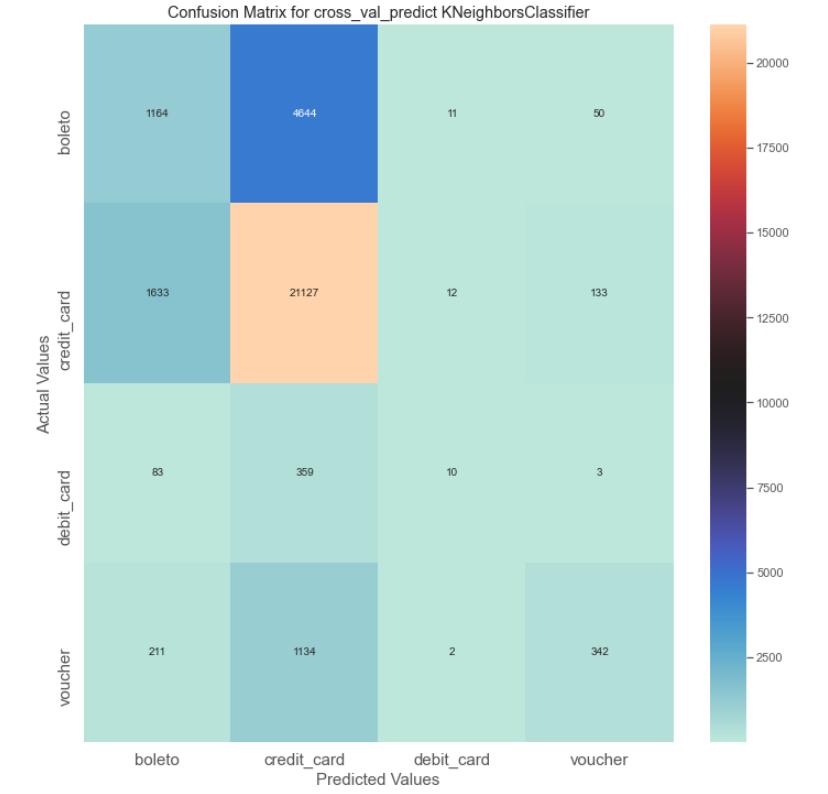
---

---
## <span style='color:blue'>M&E Section 4: Summarize the Ramifications [20 points]</span>
---

##### Option A: Cluster Analysis
- Train: Perform cluster analysis using several clustering methods (adjust parameters).
- Eval: Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters for each method?
- Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
- Summarize: Describe your results. What findings are the most interesting and why?
<br>

##### Option B: Association Rule Mining
- Train: Create frequent itemsets and association rules (adjust parameters).
- Eval: Use several measures for evaluating how interesting different rules are.
- Visualize: Use tables/visualization to discuss the found results.
- Summarize: Describe your results. What findings are the most compelling and why?
<br>

##### Option C: Collaborative Filtering
- Train: Create user-item matrices or item-item matrices using collaborative filtering (adjust parameters).
- Eval: Determine performance of the recommendations using different performance measures (explain the ramifications of each measure).
- Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
- Summarize: Describe your results. What findings are the most compelling and why?
<br>


---
## <span style='color:blue'>Deployment [10 points total]</span>
Be critical of your performance and tell the reader how you current model might be usable by other parties.
- Did you achieve your goals? If not, can you reign in the utility of your modeling?
- How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?
- How would you deploy your model for interested parties?
- What other data should be collected?
- How often would the model need to be updated, etc.?

---

---
## <span style='color:blue'>Exceptional Work [10 points total]</span>
You have free reign to provide additional analyses or combine analyses.

---